#### *Author: Vivek Prakash*
# <center>**COURSE RECOMMENDER SYSTEM**</center>

A course recommendation system is designed to assist learners in discovering courses that align with their interests, preferences, and learning goals. It utilizes algorithms to analyze user data, such as past course enrollments, ratings, and behaviors, to suggest relevant courses.
It helps in Personalised and enhanced user learning experience.

**Learning Outcomes**:
* Exploratory Data Analysis
* Training various models (Collaborative and Content- Based Filtering)
* Summary of the models

**Objective**: Build course recommendation system based on user profile and user ratings of the courses.


### About the Data
##### Course Genre: 
* COURSE_ID: Unique identifier for each course (307 non-null entries).
* TITLE: Name or title of the course (307 non-null entries).
* Database to Blockchain: These columns represent different course categories or topics, each having an integer value indicating relevance or presence in the course (307 non-null entries).

##### Ratings
* user: User identifier who rated the courses (233,306 non-null entries).
* item: Course identifier (corresponding to COURSE_ID in course_df) that the user rated (233,306 non-null entries).
* rating: Integer value representing the rating given by the user to the course (233,306 non-null entries).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
course_df = pd.read_csv('course_genre.csv')
ratings_df = pd.read_csv('ratings.csv')

In [3]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
print("the number of unique courses: " , course_df['COURSE_ID'].nunique())

the number of unique courses:  307


In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COURSE_ID        307 non-null    object
 1   TITLE            307 non-null    object
 2   Database         307 non-null    int64 
 3   Python           307 non-null    int64 
 4   CloudComputing   307 non-null    int64 
 5   DataAnalysis     307 non-null    int64 
 6   Containers       307 non-null    int64 
 7   MachineLearning  307 non-null    int64 
 8   ComputerVision   307 non-null    int64 
 9   DataScience      307 non-null    int64 
 10  BigData          307 non-null    int64 
 11  Chatbot          307 non-null    int64 
 12  R                307 non-null    int64 
 13  BackendDev       307 non-null    int64 
 14  FrontendDev      307 non-null    int64 
 15  Blockchain       307 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 38.5+ KB


### WordCloud

In [15]:
t = [title for title in course_df['TITLE'].astype(str)]
titles = " ".join(t)

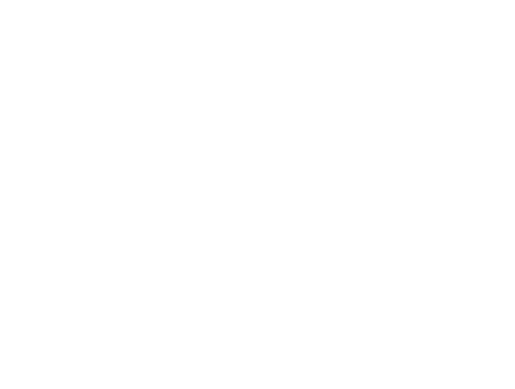

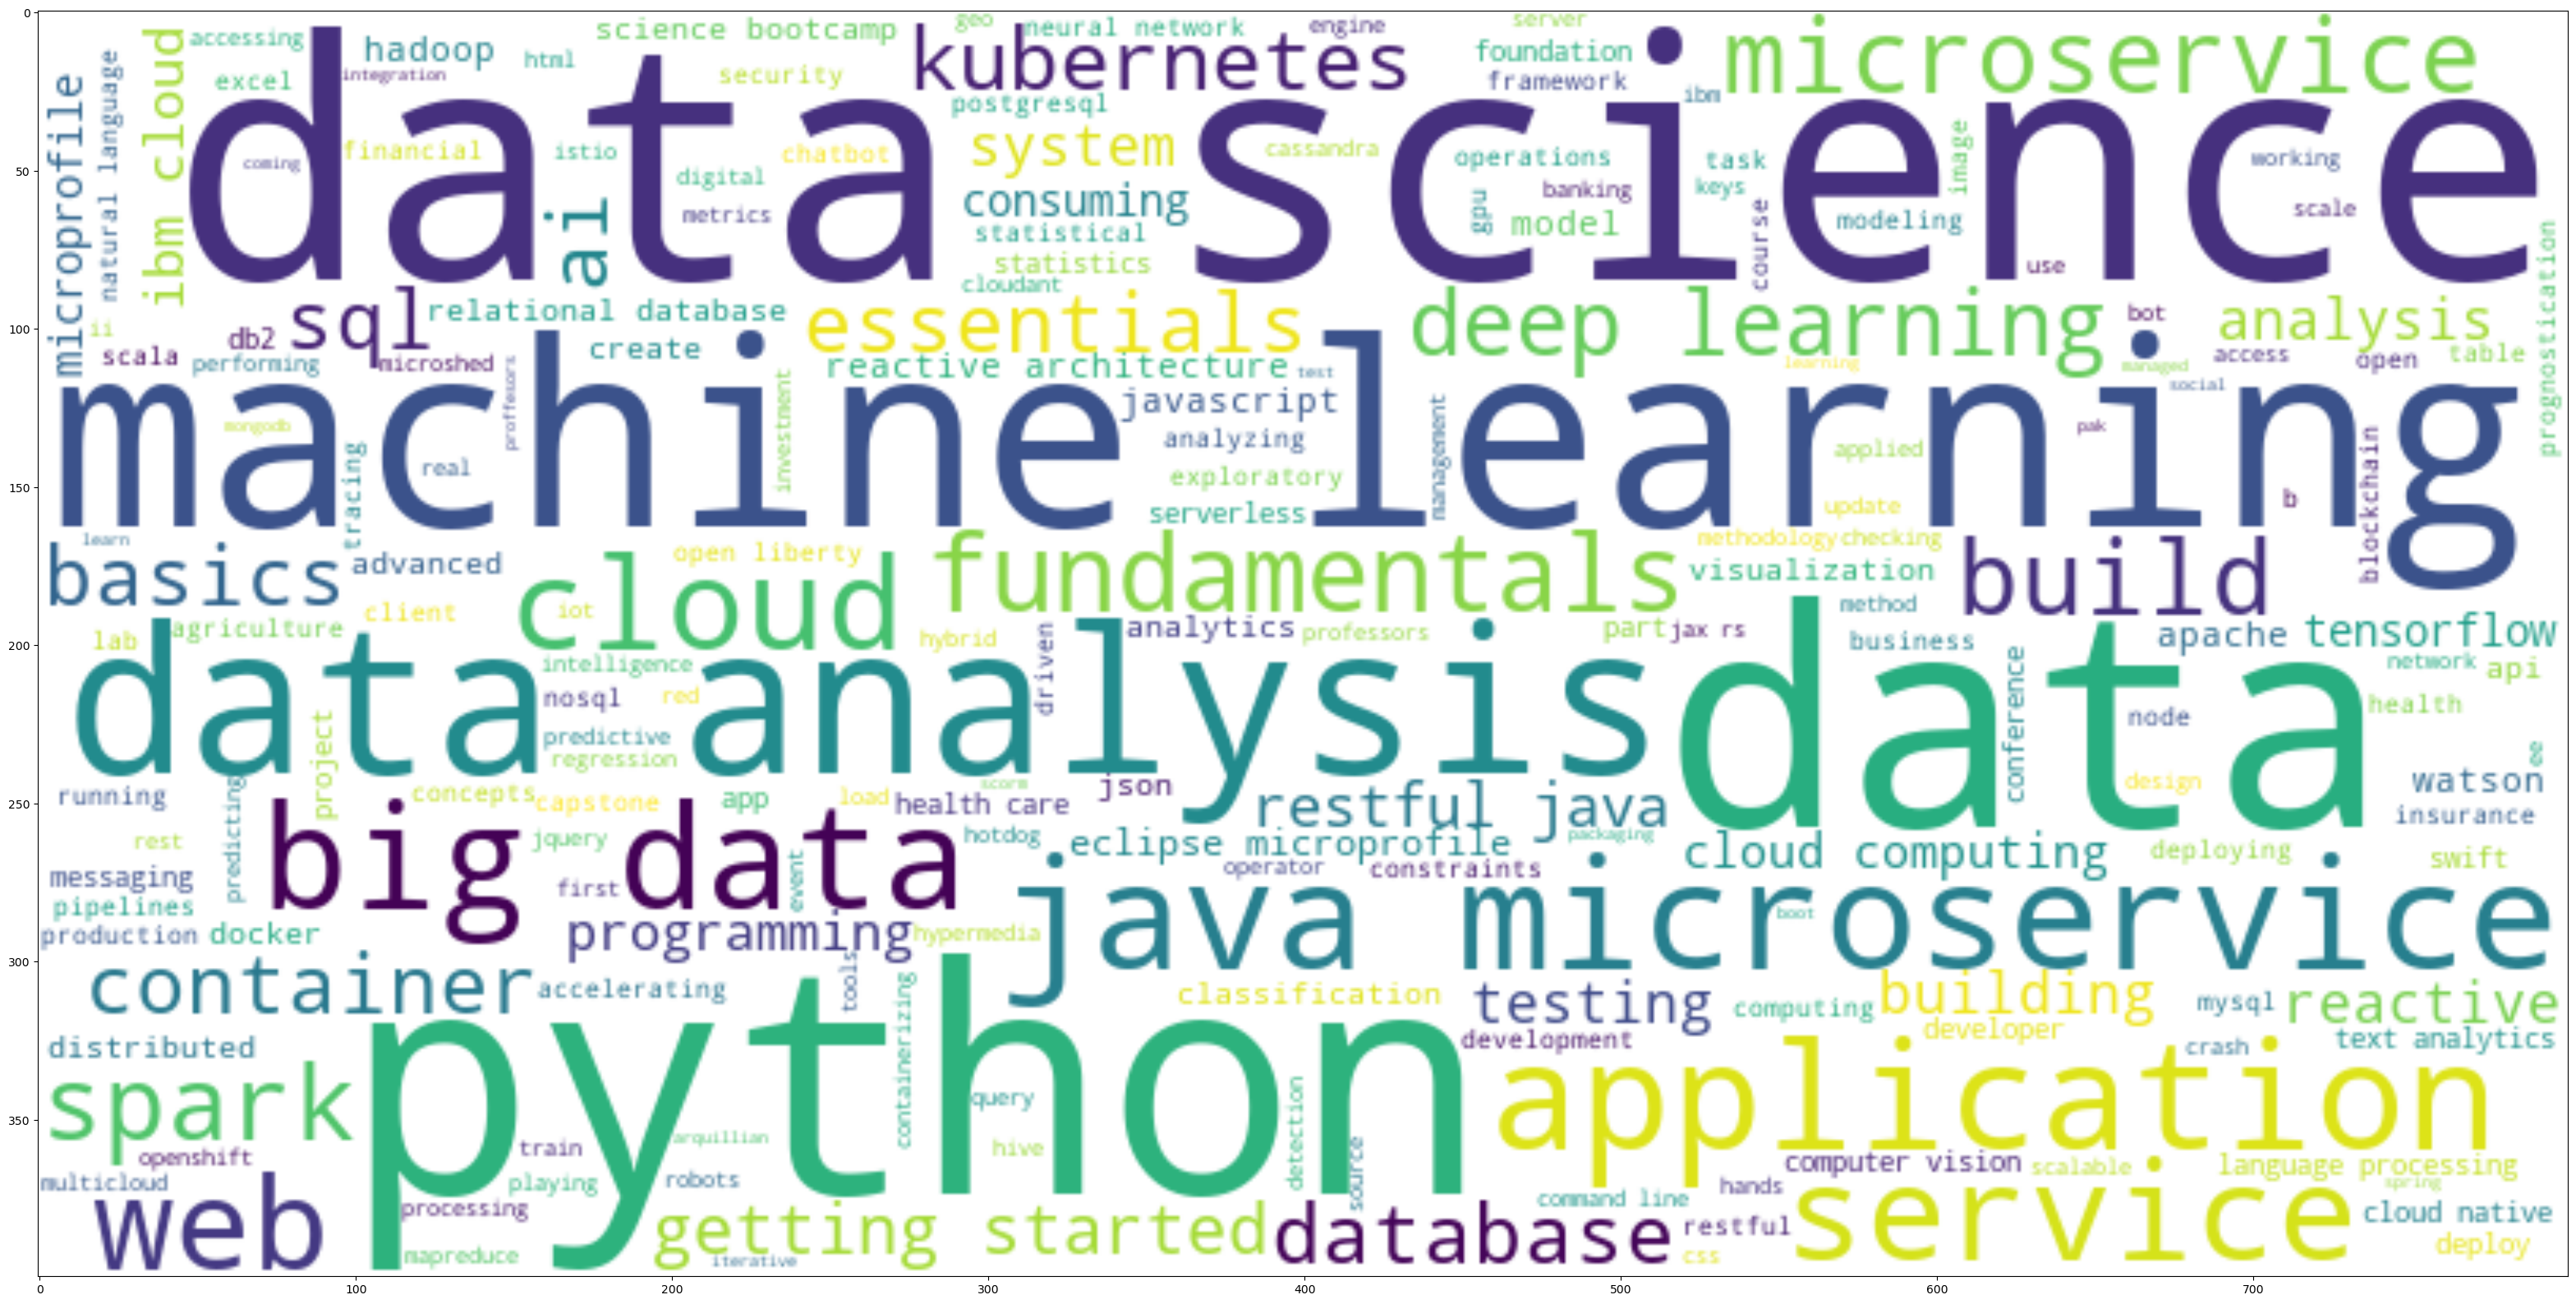

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [18]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [19]:
count_genre = course_df[genres].sum(axis=0)
res = pd.DataFrame(count_genre , columns=['Count']).sort_values(by='Count' , ascending=False)
res

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


[Text(0, 0, 'BackendDev'),
 Text(1, 0, 'MachineLearning'),
 Text(2, 0, 'Database'),
 Text(3, 0, 'DataAnalysis'),
 Text(4, 0, 'DataScience'),
 Text(5, 0, 'CloudComputing'),
 Text(6, 0, 'BigData'),
 Text(7, 0, 'Python'),
 Text(8, 0, 'FrontendDev'),
 Text(9, 0, 'Containers'),
 Text(10, 0, 'R'),
 Text(11, 0, 'ComputerVision'),
 Text(12, 0, 'Chatbot'),
 Text(13, 0, 'Blockchain')]

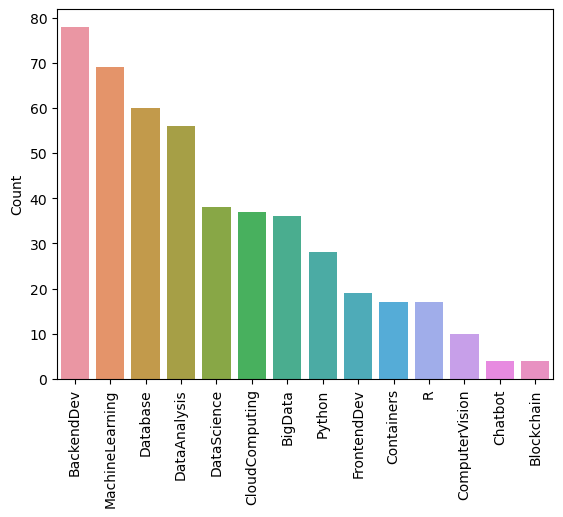

In [20]:
bar_plot = sns.barplot(x = res.index , y ='Count' , data = res)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation = 90)

In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [23]:
ratings_df['rating'].unique()

array([5, 3, 4], dtype=int64)

In [26]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   user    233306 non-null  int64 
 1   item    233306 non-null  object
 2   rating  233306 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.3+ MB


In [27]:
rat_user = ratings_df.groupby('user').size()
ans_rat = pd.DataFrame(rat_user , columns = ['count'])
ans_rat

,count
user,
2,61
4,44
5,59
7,1
8,3
...,...
2102054,8
2102356,1
2102680,11


In [28]:
ans_rat.describe()

,count
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


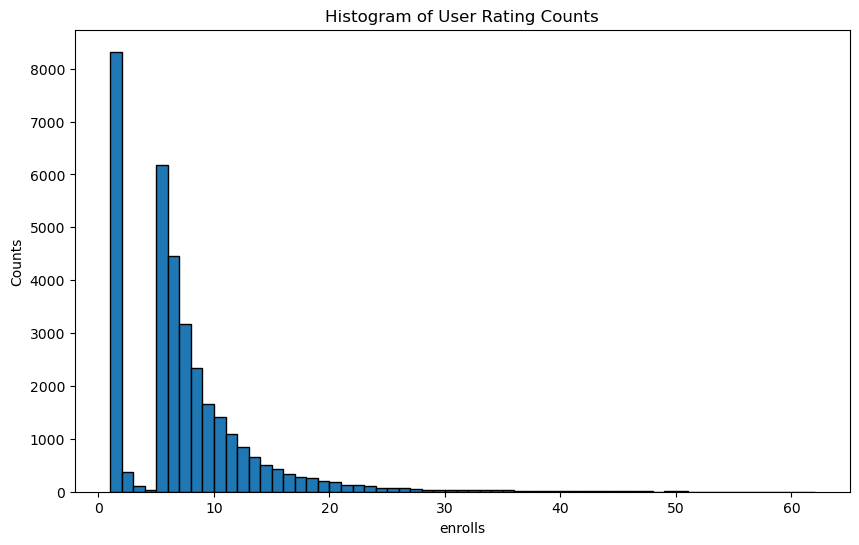

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(ans_rat, bins=range(1, rat_user.max() + 2) ,edgecolor='black')
plt.xlabel('enrolls')
plt.ylabel('Counts')
plt.title('Histogram of User Rating Counts')
plt.subplots_adjust(hspace=0.5)

In [31]:
ans_top20 = ratings_df.groupby('item').size().sort_values(ascending=False)[:20]
kl = pd.DataFrame(ans_top20 , columns=['Enrolls'])
kl

,Enrolls
item,
PY0101EN,14936
DS0101EN,14477
BD0101EN,13291
BD0111EN,10599
DA0101EN,8303
DS0103EN,7719
ML0101ENv3,7644
BD0211EN,7551
DS0105EN,7199


In [32]:
merged_df = pd.merge(kl, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='item', right_on='COURSE_ID')
merged_df = pd.DataFrame(merged_df[['TITLE', 'Enrolls']])
print(merged_df)

                                           TITLE  Enrolls
0                        python for data science    14936
1                   introduction to data science    14477
2                                   big data 101    13291
3                                     hadoop 101    10599
4                      data analysis with python     8303
5                       data science methodology     7719
6                   machine learning with python     7644
7                           spark fundamentals i     7551
8   data science hands on with open source tools     7199
9                          blockchain essentials     6719
10                data visualization with python     6709
11                             deep learning 101     6323
12                        build your own chatbot     5512
13                            r for data science     5237
14                                statistics 101     5015
15                         introduction to cloud     4983
16   docker es

In [35]:
top = kl['Enrolls'].sum()
total = ratings_df.shape[0]
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%


### User profile and Course Genres

In [5]:
test_users = ratings_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()

print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 33901


In [3]:
profile_df = pd.read_csv('user_profile.csv')
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


user: Unique identifier for each user.

Database, Python, CloudComputing, DataAnalysis, Containers, MachineLearning, ComputerVision, DataScience, BigData, Chatbot, R, BackendDev, FrontendDev, Blockchain: levels of interest indicating user preferences across various course topics

In [56]:
test_user_profile = profile_df[profile_df['user'] == 9]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
5,9,16.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,14.0,2.0,2.0,0.0,0.0,0.0


In [57]:
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([16.,  0.,  0.,  6.,  0.,  2.,  0.,  0., 14.,  2.,  2.,  0.,  0.,
        0.])

In [59]:
enrolled_courses = ratings_df[ratings_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

In [60]:
all_courses = set(course_df['COURSE_ID'].values)
all_courses 

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

In [61]:
unknown_courses = all_courses.difference(enrolled_courses)
unknown_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

In [62]:
unknown_course_genres = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [63]:
score = np.dot(course_matrix[1], test_user_vector)
score

2.0

for each test user in the test dataset, We first find out which courses are unknown/unselected to them. For example, suppose we have a user 1078030 with profile. We first find their enrolled courses in test_users_df. Then we use all courses to subtract the enrolled courses to get a set of all unknown courses for user 1078030, and we want to find potential interested courses hidden in the unknown course list. Given the user profile vector for user 1078030 and all the unseen course genres vectors above, you can use the dot product to calculate the recommendation score for each unknown course. e.g., the recommendation score for course accelerating deep learning with gpu is: 2.0. 

We will need to choose a recommendation score threshold. If the score of any course is above the threshold, we may recommend that course to the user.

In [64]:
score_threshold = 10.0

In [68]:
def generate_recommendation_scores():
    """
    Generate recommendation scores for users and courses.

    Returns:
    users (list): List of user IDs.
    courses (list): List of recommended course IDs.
    scores (list): List of recommendation scores.
    """

    users = []      # List to store user IDs
    courses = []    # List to store recommended course IDs
    scores = []     # List to store recommendation scores

    # Iterate over each user ID in the test_user_ids list
    for user_id in test_user_ids:
        # Get the user profile data for the current user
        test_user_profile = profile_df[profile_df['user'] == user_id]

        # Get the user vector for the current user id (replace with your method to obtain the user vector)
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # Get the known course ids for the current user
        enrolled_courses = ratings_df[ratings_df['user'] == user_id]['item'].to_list()

        # Calculate the unknown course ids
        unknown_courses = all_courses.difference(enrolled_courses)

        # Filter the course_genres_df to include only unknown courses
        unknown_course_df = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values

        # Calculate the recommendation scores using dot product
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]

            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])

    return users, courses, scores

In [69]:
users, courses, scores = generate_recommendation_scores()

# Create an empty dictionary named res_dict to store the results of the recommendation process
res_dict = {}

# Store the lists of users, courses, and scores into the res_dict dictionary with corresponding keys
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

# Create a DataFrame named res_df using the res_dict dictionary, specifying the column order as ['USER', 'COURSE_ID', 'SCORE']
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

# Save the res_df DataFrame to a CSV file named "profile_rs_results.csv" without including the index
res_df.to_csv("profile_rs_results.csv", index=False)

# Output the res_df DataFrame
res_df

,USER,COURSE_ID,SCORE
0,2,ML0201EN,43.0
1,2,GPXX0ZG0EN,43.0
2,2,GPXX0Z2PEN,37.0
3,2,DX0106EN,47.0
4,2,GPXX06RFEN,52.0
...,...,...,...
1500419,2102680,excourse62,15.0
1500420,2102680,excourse69,14.0
1500421,2102680,excourse77,14.0
1500422,2102680,excourse78,14.0


In [70]:
user_course_counts = res_df.groupby('USER')['COURSE_ID'].nunique()

# Calculate the average number of new courses recommended per user
average_new_courses_per_user = user_course_counts.mean()

print(f'Average number of new courses recommended per user: {average_new_courses_per_user:.2f}')

Average number of new courses recommended per user: 60.82


In [71]:
course_counts = res_df['COURSE_ID'].value_counts()

# Get the top 10 most frequently recommended courses
top_10_courses = course_counts.head(10)

print("Top 10 most frequently recommended courses:")
print(top_10_courses)

Top 10 most frequently recommended courses:
TA0106EN      17390
excourse22    15656
excourse21    15656
GPXX0IBEN     15644
ML0122EN      15603
excourse06    15062
excourse04    15062
GPXX0TY1EN    14689
excourse73    14464
excourse72    14464
Name: COURSE_ID, dtype: int64


## KMeans Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
feature_names = list(profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [16]:
scaler = StandardScaler()
profile_df[feature_names] = scaler.fit_transform(profile_df[feature_names])
print("MEAN \n{} ".format(profile_df[feature_names].mean()))
print("\nSTANDARD DEVIATION \n{}".format(profile_df[feature_names].std()))

MEAN 
Database          -3.353495e-17
Python            -5.700942e-17
CloudComputing    -3.521170e-17
DataAnalysis      -7.671120e-17
Containers         3.353495e-18
MachineLearning    3.688845e-17
ComputerVision    -1.509073e-17
DataScience       -1.676748e-17
BigData            6.706990e-17
Chatbot           -6.874665e-17
R                  4.233788e-17
BackendDev         1.383317e-17
FrontendDev        5.051202e-17
Blockchain        -5.281755e-17
dtype: float64 

STANDARD DEVIATION 
Database           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64


In [17]:
features = profile_df.loc[:, profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


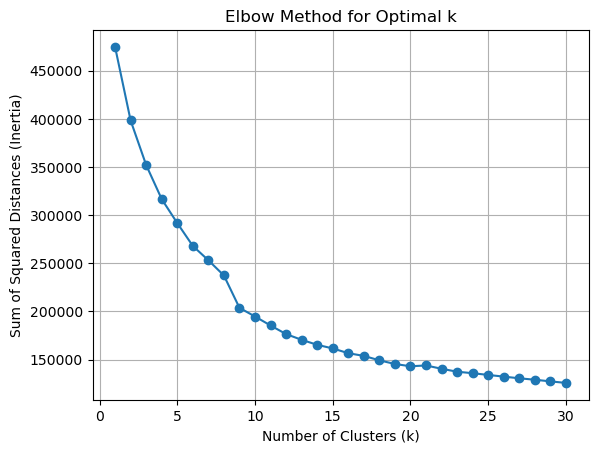

In [18]:
list_k = np.arange(1,31,1)#list(range(1,30))
ans = []

for i in range(1,31):
    km = KMeans(n_clusters = i , random_state = 123)
    km.fit(features)
    ans.append(km.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(list_k, ans, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [19]:
user_ids = profile_df.loc[:, profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


In [20]:
def combine_cluster_labels(user_ids, labels):
    labels_df = pd.DataFrame(labels)    
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

k = 15
rs = 123
km = KMeans(n_clusters=k, random_state=rs).fit(features)
label = km.labels_
cluster_labels = combine_cluster_labels(user_ids , label)
cluster_labels

,user,cluster
0,2,7
1,4,11
2,5,7
3,7,6
4,8,6
...,...,...
33896,2102054,5
33897,2102356,6
33898,2102680,1
33899,2102983,6


In [21]:
features = profile_df.loc[:, profile_df.columns != 'user']
user_ids = profile_df.loc[:, profile_df.columns == 'user']

feature_names = list(profile_df.columns[1:])
print(f"There are {len(feature_names)} features for each user profile.")

There are 14 features for each user profile.


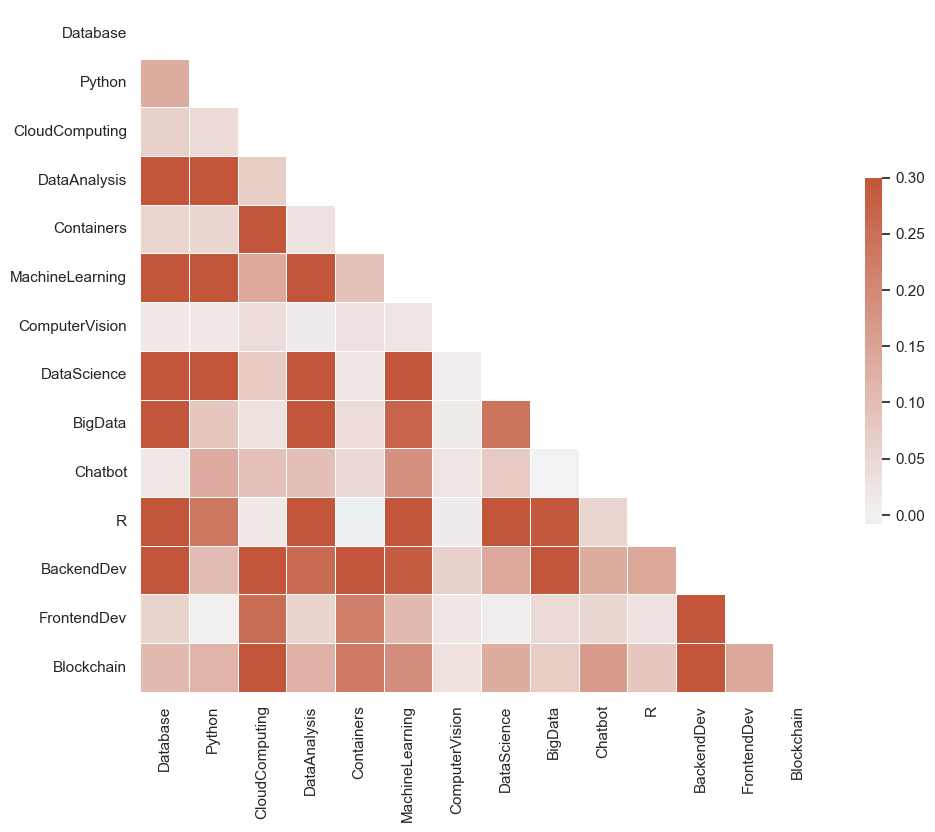

In [22]:
sns.set_theme(style="white")
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

## Principal Component Analysis

In [24]:
accumulated_variance_ratios = []
n_components_value = 0

for component in range(1, 15):
    pca = PCA(n_components=component)
    pca.fit_transform(features)
    accumulated_variance = pca.explained_variance_ratio_.sum()
    accumulated_variance_ratios.append(accumulated_variance)


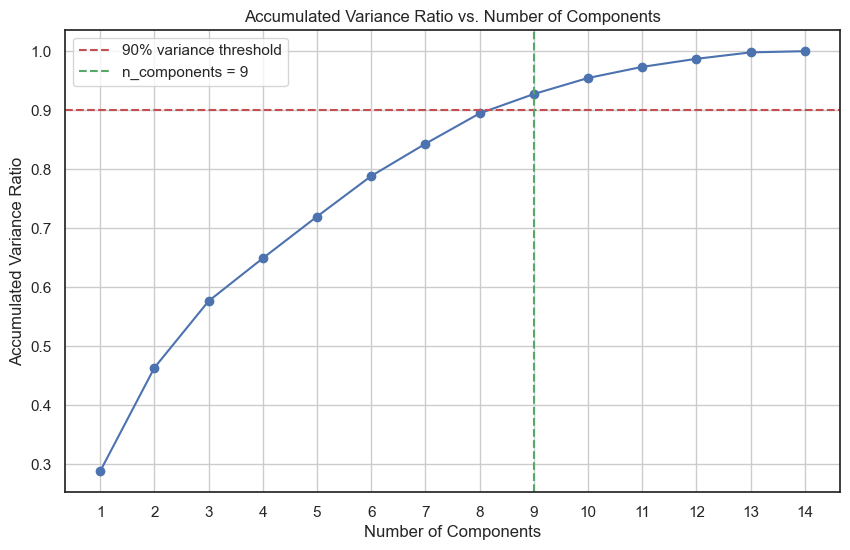

The smallest n_components value for which the accumulated variance ratio is at least 0.9 is: 9


In [25]:
n_components_value = next(x[0] for x in enumerate(accumulated_variance_ratios, 1) if x[1] >= 0.9)

# Plot the accumulated variance ratios
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), accumulated_variance_ratios, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
plt.axvline(x=n_components_value, color='g', linestyle='--', label=f'n_components = {n_components_value}')
plt.title('Accumulated Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accumulated Variance Ratio')
plt.xticks(range(1, 15))
plt.legend()
plt.grid(True)
plt.show()

# Output the smallest n_components value for which accumulated_variance_ratios >= 0.9
print(f"The smallest n_components value for which the accumulated variance ratio is at least 0.9 is: {n_components_value}")

In [26]:
pca = PCA(n_components=n_components_value)
pca_components = pca.fit_transform(features)

# Create a DataFrame from the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i}' for i in range(n_components_value)])
# Merge the components DataFrame with the user IDs DataFrame
merged_df = pd.merge(user_ids, pca_df, left_index=True, right_index=True)


# Output the resulting DataFrame
print(merged_df)

          user        PC0       PC1       PC2       PC3       PC4       PC5  \
0            2  17.772494  0.200681  1.730609  2.567359 -3.825814 -2.707154   
1            4   7.145199 -2.847481  2.358636 -0.576654  0.398803  0.134533   
2            5  11.363270  1.873619 -1.522077  1.076144 -1.711688 -0.883212   
3            7  -1.834033 -0.277462  0.564905  0.053470 -0.064440 -0.165757   
4            8  -1.049125 -0.684767  1.072765  0.006371 -0.005695 -0.118686   
...        ...        ...       ...       ...       ...       ...       ...   
33896  2102054   0.633824  0.108815 -0.388871 -0.122665 -0.098364 -0.358333   
33897  2102356  -2.095339  0.135058  0.244727 -0.088185  0.025081 -0.183641   
33898  2102680   0.625943 -0.547167 -1.692824 -0.630589  0.166632 -0.676244   
33899  2102983  -2.036832 -0.153534  0.162852  0.082651 -0.126419 -0.255109   
33900  2103039  -2.036832 -0.153534  0.162852  0.082651 -0.126419 -0.255109   

            PC6       PC7       PC8  
0      0.6810

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(pca_components)
user_labels = kmeans.labels_

cluster_labels = kmeans.labels_

cluster_df = pd.DataFrame({
    'user': user_ids['user'],
    'cluster': cluster_labels
})

print(cluster_df)

          user  cluster
0            2       11
1            4        6
2            5       11
3            7        1
4            8        1
...        ...      ...
33896  2102054        4
33897  2102356        1
33898  2102680       12
33899  2102983        1
33900  2103039        1

[33901 rows x 2 columns]


In [28]:
test_users_df = ratings_df[['user', 'item']]
test_users_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [29]:
test_users_labelled = pd.merge(test_users_df, cluster_df, left_on='user', right_on='user')
test_users_labelled

,user,item,cluster
0,1889878,CC0101EN,14
1,1889878,ML0120ENv2,14
2,1889878,DV0151EN,14
3,1889878,HCC104EN,14
4,1889878,BD0211EN,14
...,...,...,...
233301,1525198,CNSC02EN,1
233302,1047293,BC0201EN,1
233303,1653442,CNSC02EN,1
233304,946438,BC0201EN,1


## Non-Negative Matrix Factorization

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

trainset, testset = train_test_split(ratings_df, test_size=0.3, random_state=42)
interaction_matrix = trainset.pivot(index='user', columns='item', values='rating').fillna(0)
# Define the number of latent factors
n_factors = 20 

# Initialize NMF model
nmf_model = NMF(n_components=n_factors, init='random', random_state=42)

# Fit the model to the interaction matrix
W = nmf_model.fit_transform(interaction_matrix)  # User-feature matrix
H = nmf_model.components_  # Feature-item matrix
# Reconstruct the interaction matrix
predicted_interaction_matrix = np.dot(W, H)

# Convert the predicted matrix back to a DataFrame for easy access
predicted_ratings_df = pd.DataFrame(predicted_interaction_matrix, index=interaction_matrix.index, columns=interaction_matrix.columns)
def calculate_rmse(testset, predicted_ratings_df):
    # Create a list to store actual and predicted ratings
    actual_ratings = []
    predicted_ratings = []
    
    # Iterate through the test set and get the predicted ratings
    for _, row in testset.iterrows():
        user, course, actual_rating = row['user'], row['item'], row['rating']
        if user in predicted_ratings_df.index and course in predicted_ratings_df.columns:
            predicted_rating = predicted_ratings_df.loc[user, course]
            actual_ratings.append(actual_rating)
            predicted_ratings.append(predicted_rating)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    return rmse

# Calculate RMSE
rmse = calculate_rmse(testset, predicted_ratings_df)
print(f'RMSE: {rmse}')


RMSE: 3.8138823678167633


## Neural Network Model

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
class RecommenderNet(keras.Model):
    
    def __init__(self, num_users, num_items, embedding_size=16, **kwargs):
        """
           Constructor
           :param int num_users: number of users
           :param int num_items: number of items
           :param int embedding_size: the size of embedding vector
        """
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        
        # Define a user_embedding vector
        # Input dimension is the num_users
        # Output dimension is the embedding size
        self.user_embedding_layer = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            name='user_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define a user bias layer
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias")
        
        # Define an item_embedding vector
        # Input dimension is the num_items
        # Output dimension is the embedding size
        self.item_embedding_layer = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            name='item_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define an item bias layer
        self.item_bias = layers.Embedding(
            input_dim=num_items,
            output_dim=1,
            name="item_bias")
        
    def call(self, inputs):
        """
           method to be called during model fitting
           
           :param inputs: user and item one-hot vectors
        """
        # Compute the user embedding vector
        user_vector = self.user_embedding_layer(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        item_vector = self.item_embedding_layer(inputs[:, 1])
        item_bias = self.item_bias(inputs[:, 1])
        dot_user_item = tf.tensordot(user_vector, item_vector, 2)
        # Add all the components (including bias)
        x = dot_user_item + user_bias + item_bias
        # Sigmoid output layer to output the probability
        return tf.nn.relu(x)

In [7]:
def process_dataset(raw_data):
    
    encoded_data = raw_data.copy()
    
    # Mapping user ids to indices
    user_list = encoded_data["user"].unique().tolist()
    user_id2idx_dict = {x: i for i, x in enumerate(user_list)}
    user_idx2id_dict = {i: x for i, x in enumerate(user_list)}
    
    # Mapping course ids to indices
    course_list = encoded_data["item"].unique().tolist()
    course_id2idx_dict = {x: i for i, x in enumerate(course_list)}
    course_idx2id_dict = {i: x for i, x in enumerate(course_list)}

    # Convert original user ids to idx
    encoded_data["user"] = encoded_data["user"].map(user_id2idx_dict)
    # Convert original course ids to idx
    encoded_data["item"] = encoded_data["item"].map(course_id2idx_dict)
    # Convert rating to int
    encoded_data["rating"] = encoded_data["rating"].values.astype("int")

    return encoded_data, user_idx2id_dict, course_idx2id_dict

In [8]:
encoded_data, user_idx2id_dict, course_idx2id_dict = process_dataset(ratings_df)
encoded_data.head()

,user,item,rating
0,0,0,5
1,1,1,3
2,2,2,5
3,3,3,5
4,4,4,3


In [13]:
def generate_train_test_datasets(dataset, scale=True):

    min_rating = min(dataset["rating"])
    max_rating = max(dataset["rating"])

    dataset = dataset.sample(frac=1, random_state=42)
    x = dataset[["user", "item"]].values
    if scale:
        y = dataset["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    else:
        y = dataset["rating"].values

    # Assuming training on 80% of the data and validating on 10%, and testing 10%
    train_indices = int(0.8 * dataset.shape[0])
    test_indices = int(0.9 * dataset.shape[0])

    x_train, x_val, x_test, y_train, y_val, y_test = (
        x[:train_indices],
        x[train_indices:test_indices],
        x[test_indices:],
        y[:train_indices],
        y[train_indices:test_indices],
        y[test_indices:],
    )
    return x_train, x_val, x_test, y_train, y_val, y_test

In [15]:
x_train, x_val, x_test, y_train, y_val, y_test = generate_train_test_datasets(encoded_data)
user_indices = x_train[:, 0]
user_indices

array([ 8376,  7659, 10717, ...,  3409, 28761,  4973], dtype=int64)

In [17]:
item_indices = x_train[:, 1]
item_indices

array([12, 29,  3, ..., 18, 19, 17], dtype=int64)

In [19]:
y_train

array([0., 0., 0., ..., 0., 1., 0.])

In [27]:
num_users = ratings_df['user'].nunique()
num_items = ratings_df['item'].nunique()

print(f"the number of unique users: {num_users}")
print(f"the number of unique items: {num_items}")

the number of unique users: 33901
the number of unique items: 126


In [37]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
embedding_size = 16
model = RecommenderNet(num_users, num_items, embedding_size)
model.compile(
    loss=tensorflow.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[tensorflow.keras.metrics.RootMeanSquaredError()]
)

# Train the model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val),
    verbose=1
)

test_loss, test_rmse = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.2297 - root_mean_squared_error: 0.4767 - val_loss: 0.1796 - val_root_mean_squared_error: 0.4231
Epoch 2/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.1748 - root_mean_squared_error: 0.4172 - val_loss: 0.1781 - val_root_mean_squared_error: 0.4210
Epoch 3/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.1596 - root_mean_squared_error: 0.3983 - val_loss: 0.1792 - val_root_mean_squared_error: 0.4219
Epoch 4/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.1541 - root_mean_squared_error: 0.3909 - val_loss: 0.1830 - val_root_mean_squared_error: 0.4260
Epoch 5/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.1524 - root_mean_squared_error: 0.3882 - val_loss: 0.1876 - val_root_mean_squared_error: 0.4310
Epoch 6/10
2917/2917 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.1515 - root_mean_squared_error: 0.3867 - val_loss: 0.1908 - val_root_mean_squared_error: 0.4343
Epoch 7/10
2917/2917 ━━━━━━━━━━━━━

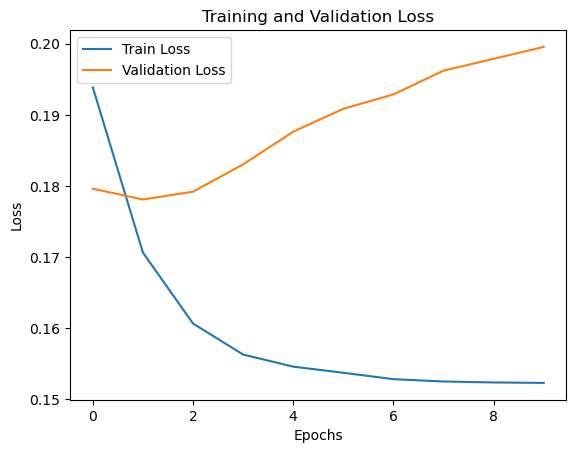

In [39]:
# Plot the train and validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [41]:
model.summary()

Model: "recommender_net_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ user_embedding_layer            │ ?                      │       542,416 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ user_bias (Embedding)           │ ?                      │        33,901 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ item_embedding_layer            │ ?                      │         2,016 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ item_bias (Embedding)           │ ?                      │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,379 (6.62 MB)

 Trainable params: 578,459 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,156,920 (4.41 MB)

## Regression-based Rating Score Prediction using Embedding Features

In [7]:
user_emb = pd.read_csv("user_embeddings.csv")
course_emb = pd.read_csv("course_embeddings.csv")

In [9]:
user_emb.head()

,user,UFeature0,UFeature1,UFeature2,UFeature3,UFeature4,UFeature5,UFeature6,UFeature7,UFeature8,UFeature9,UFeature10,UFeature11,UFeature12,UFeature13,UFeature14,UFeature15
0,1889878,0.080721,-0.129561,0.087998,0.030231,0.082691,-0.004176,-0.003480,0.091464,-0.040247,0.018958,-0.153328,-0.090143,0.082830,-0.058721,0.057929,-0.001472
1,1342067,0.068047,-0.112781,0.045208,-0.007570,-0.038382,0.068037,0.114949,0.104128,-0.034401,0.004011,0.064832,0.165857,-0.004384,0.053257,0.014308,0.056684
2,1990814,0.124623,0.012910,-0.072627,0.049935,0.020158,0.133306,-0.035366,-0.156026,0.039269,0.042195,0.014695,-0.115989,0.031158,0.102021,-0.020601,0.116488
3,380098,-0.034870,0.000715,0.077406,0.070311,-0.043007,-0.035446,0.032846,-0.060944,0.112384,0.002114,0.090660,-0.068545,0.008967,0.063962,0.052347,0.018072
4,779563,0.106414,-0.001887,-0.017211,-0.042277,-0.074953,-0.056732,0.074610,-0.019367,-0.031341,0.064896,-0.048158,-0.047309,-0.007544,0.010474,-0.032287,-0.083983


In [11]:
course_emb.head()

,item,CFeature0,CFeature1,CFeature2,CFeature3,CFeature4,CFeature5,CFeature6,CFeature7,CFeature8,CFeature9,CFeature10,CFeature11,CFeature12,CFeature13,CFeature14,CFeature15
0,CC0101EN,0.009657,-0.005238,-0.004098,0.016303,-0.005274,-0.000361,-0.015081,-0.012229,0.015686,0.008401,-0.035495,0.009381,-0.032560,-0.007292,0.000966,-0.006218
1,CL0101EN,-0.008611,0.028041,0.021899,-0.001465,0.006900,-0.017981,0.010899,-0.037610,-0.019397,-0.025682,-0.000620,0.038803,0.000196,-0.045343,0.012863,0.019429
2,ML0120ENv3,0.027439,-0.027649,-0.007484,-0.059451,0.003972,0.020496,-0.012695,0.036138,0.019965,0.018686,-0.010450,-0.050011,0.013845,-0.044454,-0.001480,-0.007559
3,BD0211EN,0.020163,-0.011972,-0.003714,-0.015548,-0.007540,0.014847,-0.005700,-0.006068,-0.005792,-0.023036,0.015999,-0.023480,0.015469,0.022221,-0.023115,-0.001785
4,DS0101EN,0.006399,0.000492,0.005640,0.009639,-0.005487,-0.000590,-0.010015,-0.001514,-0.017598,0.003590,0.016799,0.002732,0.005162,0.015031,-0.000877,-0.021283


In [13]:
user_emb_merged = pd.merge(ratings_df, user_emb, how='left', left_on='user', right_on='user').fillna(0)
# Merge course embedding features
merged_df = pd.merge(user_emb_merged, course_emb, how='left', left_on='item', right_on='item').fillna(0)
merged_df.head()

,user,item,rating,UFeature0,UFeature1,UFeature2,UFeature3,UFeature4,UFeature5,UFeature6,...,CFeature6,CFeature7,CFeature8,CFeature9,CFeature10,CFeature11,CFeature12,CFeature13,CFeature14,CFeature15
0,1889878,CC0101EN,5,0.080721,-0.129561,0.087998,0.030231,0.082691,-0.004176,-0.003480,...,-0.015081,-0.012229,0.015686,0.008401,-0.035495,0.009381,-0.032560,-0.007292,0.000966,-0.006218
1,1342067,CL0101EN,3,0.068047,-0.112781,0.045208,-0.007570,-0.038382,0.068037,0.114949,...,0.010899,-0.037610,-0.019397,-0.025682,-0.000620,0.038803,0.000196,-0.045343,0.012863,0.019429
2,1990814,ML0120ENv3,5,0.124623,0.012910,-0.072627,0.049935,0.020158,0.133306,-0.035366,...,-0.012695,0.036138,0.019965,0.018686,-0.010450,-0.050011,0.013845,-0.044454,-0.001480,-0.007559
3,380098,BD0211EN,5,-0.034870,0.000715,0.077406,0.070311,-0.043007,-0.035446,0.032846,...,-0.005700,-0.006068,-0.005792,-0.023036,0.015999,-0.023480,0.015469,0.022221,-0.023115,-0.001785
4,779563,DS0101EN,3,0.106414,-0.001887,-0.017211,-0.042277,-0.074953,-0.056732,0.074610,...,-0.010015,-0.001514,-0.017598,0.003590,0.016799,0.002732,0.005162,0.015031,-0.000877,-0.021283


In [15]:
u_features = [f"UFeature{i}" for i in range(16)] 
c_features = [f"CFeature{i}" for i in range(16)] 

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

dataset = user_embeddings + course_embeddings.values
dataset.columns = [f"Feature{i}" for i in range(16)]
dataset['rating'] = ratings
dataset.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,rating
0,0.090378,-0.134799,0.083900,0.046534,0.077417,-0.004537,-0.018561,0.079236,-0.024561,0.027359,-0.188823,-0.080762,0.050271,-0.066013,0.058894,-0.007689,5
1,0.059437,-0.084740,0.067107,-0.009036,-0.031482,0.050057,0.125847,0.066517,-0.053798,-0.021671,0.064212,0.204660,-0.004188,0.007914,0.027170,0.076114,3
2,0.152061,-0.014739,-0.080112,-0.009516,0.024130,0.153802,-0.048061,-0.119888,0.059234,0.060882,0.004244,-0.166000,0.045002,0.057566,-0.022081,0.108929,5
3,-0.014707,-0.011257,0.073692,0.054763,-0.050547,-0.020599,0.027146,-0.067012,0.106593,-0.020921,0.106658,-0.092025,0.024436,0.086183,0.029232,0.016287,5
4,0.112812,-0.001395,-0.011572,-0.032638,-0.080440,-0.057321,0.064595,-0.020880,-0.048939,0.068486,-0.031359,-0.044577,-0.002381,0.025505,-0.033164,-0.105266,3


In [17]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

Input data shape: (233306, 16), Output data shape: (233306,)


In [21]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X_train , X_test , y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [25]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Define hyperparameters for each model
param_grids = {
    'Ridge': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}
}

best_models = {}
best_scores = {}

# Iterate over models and hyperparameters
for name, model in models.items():
    if name == 'LinearRegression':
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        best_models[name] = model
        best_scores[name] = rmse
    else:
        grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        best_models[name] = best_model
        best_scores[name] = rmse

# Print the best model and its RMSE
for name, score in best_scores.items():
    print(f"{name} Test RMSE: {score}")

# Print the best parameters for each model
for name, model in best_models.items():
    if name != 'LinearRegression':
        print(f"Best parameters for {name}: {model.get_params()}")

LinearRegression Test RMSE: 0.8138346209967071
Ridge Test RMSE: 0.813829831172954
Lasso Test RMSE: 0.8138177875012098
ElasticNet Test RMSE: 0.8138177875012098
Best parameters for Ridge: {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Best parameters for Lasso: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Best parameters for ElasticNet: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


## Classification-based Rating Mode Prediction using Embedding Features

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode the target variable (y_raw) using the LabelEncoder
# .values.ravel() converts the target variable to a flattened array before encoding
# The LabelEncoder fits and transforms the target variable, assigning encoded labels to y
y_data = label_encoder.fit_transform(y.values.ravel())
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=123)
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

Input data shape: (233306, 16), Output data shape: (233306,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

LogisticRegression Accuracy: 0.33468346834683466
DecisionTree Accuracy: 0.3345977454888346


In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVC Accuracy: {accuracy_linear}")

C:\Users\praka\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Accuracy: 0.3343405769148343


### Summary of Data Analysis Using K-means Clustering and Dimensionality Reduction
1. ##### K-means Clustering Analysis:
   Optimal K: After evaluating various values of K using the elbow method or silhouette score, K-means clustering identified 15 as the optimal number of clusters for the dataset. This segmentation allows for meaningful grouping of data points based on similarity in features.

2. ##### Dimensionality Reduction
   1. Principal Component Analysis (PCA): PCA was employed to reduce the dimensionality of the dataset while preserving variance. By selecting the smallest n_components value where the accumulated variance ratio reached at least 0.9, PCA determined that 9 principal components were sufficient to represent 90% of the variance in the original data.

   2. Non-Negative Matrix Factorization (NMF): Course recommender system achieved an RMSE of 3.81 using NMF (Non-negative Matrix Factorization). This metric indicates the average prediction error of our model, with lower values indicating better predictive accuracy. The NMF technique effectively decomposes the user-item interaction matrix, allowing us to provide personalized course recommendations with reduced error."

# INSIGHTS

#### Classification Models:
1. Logistic Regression:
   Accuracy: 0.3347
   Logistic Regression shows modest accuracy in predicting user interactions with courses. It performs similarly to other classification models.

3. Decision Tree:
Accuracy: 0.3346
Decision Tree's accuracy is comparable to Logistic Regression, indicating consistent performance in classifying user preferences for courses.

4. Linear SVC (Support Vector Classifier):
Accuracy: 0.3343
Linear SVC performs similarly to Logistic Regression and Decision Tree, suggesting it also effectively categorizes user interactions with courses.

#### Regression Models
1. Linear Regression:
RMSE: 0.8138
Linear Regression yields an RMSE of approximately 0.81, indicating its ability to predict course ratings with reasonable accuracy.

2. Ridge Regression:
RMSE: 0.8138
Ridge Regression's RMSE closely matches Linear Regression, suggesting it provides similar predictive performance while potentially handling multicollinearity better. It uses a high regularization strength (alpha=100), suitable for reducing overfitting by penalizing large coefficients.

3. Lasso Regression:
RMSE: 0.8138
 Lasso Regression's RMSE aligns closely with Linear and Ridge Regression, implying it offers comparable prediction accuracy with potential feature selection benefits. It  uses a moderate regularization strength (alpha=0.01) and l1_ratio=1, emphasizing feature selection by encouraging sparsity in coefficients.

4. ElasticNet Regression:
RMSE: 0.8138
ElasticNet Regression combines L1 and L2 penalties (l1_ratio=0.1) with a moderate regularization strength (alpha=0.01), providing a balanced approach between Ridge and Lasso regularization.

#### Neural Network Model
1. RecommenderNet
Loss: 0.1977
Test RMSE: 0.4413
The Keras-based neural network achieves a low loss and RMSE, indicating strong performance in predicting course ratings or user preferences.

# SUMMARY

1. Classification Models: Logistic Regression, Decision Tree, and Linear SVC show consistent performance with modest accuracy in predicting user interactions with courses.

2. Regression Models: Linear Regression, Ridge, Lasso, and ElasticNet demonstrate similar RMSE values, suggesting they all provide reliable predictions of course ratings.

3. Neural Network: The recommenderNet Keras model stands out with a low loss and RMSE, indicating superior performance in learning complex patterns and predicting user preferences for courses.